In [1]:
pip install stanza


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import re
import nltk
from nltk import word_tokenize , sent_tokenize , pos_tag
from tdmh import *
from os.path import join
from os.path import isfile , join
import stanza
import pandas as pd
import re
from collections import Counter
from nltk import word_tokenize
from textblob import TextBlob
from textblob_nl import PatternTagger, PatternAnalyzer
from tdmh import *
from sklearn.metrics.pairwise import cosine_distances , euclidean_distances
from os.path import join
from os.path import isfile , join

In [3]:
stanza.download('nl')      
nlp = stanza.Pipeline('nl')

def get_title(path):
    title = os.path.basename(path)
    if re.search( r'txt$' , title ):
       
        title = title[ :title.index('.txt') ]
     
        title = re.sub( r'[.,]' , '' , title )
    return title

2023-06-20 13:41:22 INFO: Downloading default packages for language: nl (Dutch) ...
2023-06-20 13:41:25 INFO: File exists: C:\Users\daphn\stanza_resources\nl\default.zip
2023-06-20 13:41:32 INFO: Finished downloading models and saved to C:\Users\daphn\stanza_resources.
2023-06-20 13:41:32 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-06-20 13:41:34 INFO: Loading these models for language: nl (Dutch):
| Processor | Package |
-----------------------
| tokenize  | alpino  |
| pos       | alpino  |
| lemma     | alpino  |
| depparse  | alpino  |
| ner       | conll02 |

2023-06-20 13:41:34 INFO: Using device: cpu
2023-06-20 13:41:35 INFO: Loading: tokenize
2023-06-20 13:41:35 INFO: Loading: pos
2023-06-20 13:41:35 INFO: Loading: lemma
2023-06-20 13:41:35 INFO: Loading: depparse
2023-06-20 13:41:36 INFO: Loading: ner
2023-06-20 13:41:37 INFO: Done loading processors!


In [4]:
texts = []
dir = 'Chronicles'

for entry in os.listdir(dir): 
   
    path = os.path.join(dir,entry)
    texts.append(path)

print(texts)

['Chronicles\\1473_Zier_Smit.txt', 'Chronicles\\1507_Beek_Anon.txt', 'Chronicles\\1526_Zwol_Muld.txt', 'Chronicles\\1535_Gron_Anon.txt', 'Chronicles\\1544_Bred_Anon.txt', 'Chronicles\\1545_Kuri_Munt.txt', 'Chronicles\\1548_Utre_Mijn.txt', 'Chronicles\\1551_Kamp_Bred.txt', 'Chronicles\\1553_Utre_Mijn.txt', 'Chronicles\\1558_Bosc_Cupe.txt', 'Chronicles\\1567_Amst_Bies.txt', 'Chronicles\\1567_Amst_Reae.txt', 'Chronicles\\1568_Gent_Vaer.txt', 'Chronicles\\1570_Rott_Alle.txt', 'Chronicles\\1571_Gent_Camp.txt', 'Chronicles\\1574_Antw_EykP.txt', 'Chronicles\\1574_Antw_Haec.txt', 'Chronicles\\1575_Antw_Ulle.txt', 'Chronicles\\1575_Bosc_Anon.txt', 'Chronicles\\1576_Utre_Anon.txt', 'Chronicles\\1576_Zier_Clae.txt', 'Chronicles\\1577_Utre_Anon.txt', 'Chronicles\\1579_Amst_Jaco_01.txt', 'Chronicles\\1579_Amst_Jaco_02.txt', 'Chronicles\\1580_Antw_Wese.txt', 'Chronicles\\1581_Haar_Verw.txt', 'Chronicles\\1582_Stee_Steg.txt', 'Chronicles\\1583_Bilt_ErpH.txt', 'Chronicles\\1584_Brug_Weyd.txt', 'Chroni

Word frequencies


In [32]:
stopwords = ['.', ',', ':', ';', '(', ')', '/', '-', '?', 'de', 'van', 'den', 'en', 'in', 'het', 'ende', 'te', 'dat', 'die', 'op', 'een', 'met', 'is', 'tot', 'was', 'der', 'om', 'als', 'door', 'voor', 'niet', 'daer', 'hebben', 'men', 'alle', 'aen', 'heeft', 'zijn', 'bij', 'naer', 't', 'ten', 'zoo', 'hij', 'worden', 'soo', 'sijn', 'des', 'eenen', 'dit', 'hem', 'maer', 'onder', 'hier', 'eene', 'over', 'doen', 'ook', 'aan', 'dese', 'hun', 'of', 'dan', 'andere', 'al', 'wel', 'hadden', 'na', 'haer', 'waeren', 'ons', 'binnen', 'hadde', 'geweest', 'zij', 'er', 'veel', 'vande', 'nog', 'ter', 'sij', 'sy', 'deze', 'twee', 'ofte', 'wij', 'meer', 'und', 'noch', 'syn', 'welke', 'hy', 'nu', 'weder', '2', 'hunne', 'daar', 'a', 'waer', 'zyn', 'et', 'int', 'oock', 'waren', 'zeer', 'la', 'alhier', 'selve', 's', 'uijt', '3', 'zal', 'geen', 'desen', 'mede', 'ontrent', 'wat', 'seer', 'dito', 'dien', 'inde', 'vanden', 'toe', '4', 'gedaen', 'zijnde', 'zullen', 'le', '1', 'wiert', 'hebbende', 'uit', 'maar', '6', 'aldaer', 'zoude', '5', 'werden', '10', 'an', 'uyt', 'deser', 'wierden', 'tegen', '8']

In [40]:
tijding = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe', 'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe']
courant = ['courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten']
gazette = ['gazette', 'gaset', 'gasetten', 'gasette']
nieuws = ['nieuwsbladen','nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 'nieuwstijdingen', 
            'nieuwstijding', 'nieuwstyding''nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen', 'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen', 
            'nieuwstijdinge', 'nieuwstydynghe', 'nieuwstijdijnge', 'nieuwstijdijnghe']
all_terms = tijding + courant + gazette + nieuws

In [21]:
dir = 'Chronicles'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):

        path = join( dir, file )

        with open( path , encoding = 'utf-8' ) as fh:
            full_text = fh.read()

    freq = dict()

    words = word_tokenize(full_text)
    words = [w.lower() for w in words if w.lower() not in stopwords]

    for w in words:
        w = w.lower()
        freq[w] = freq.get(w,0) + 1
        

    nr_words = len(words)
    print( f'{file}:The cronicle contains {nr_words} words.')

    count = 0 
    max = 25

    print( f' \n{max} most frequent words:' )

    for f in sortedByValue( freq , ascending = False ) :
        count += 1
        print( f'{f} -> {freq[f]}' )
        if max == count:   
            break 

1473_Zier_Smit.txt:The cronicle contains 2207 words.
 
25 most frequent words:
stede -> 49
ick -> 23
zy -> 18
't -> 17
doe -> 17
zierixee -> 16
hartoge -> 15
want -> 14
dach -> 14
voer -> 13
wort -> 12
heeren -> 12
jaer -> 11
hollant -> 11
mij -> 10
gr -> 10
heere -> 10
jan -> 10
ziericxzee -> 9
omme -> 9
mijn -> 8
zeere -> 8
anno -> 8
voers -> 7
soe -> 7
1507_Beek_Anon.txt:The cronicle contains 36879 words.
 
25 most frequent words:
off -> 706
so -> 520
ser -> 511
due -> 486
waes -> 467
eyn -> 414
myt -> 402
vurs -> 368
doer -> 361
also -> 354
hoen -> 332
hee -> 289
ouch -> 268
inden -> 237
hertoch -> 235
synte -> 216
mer -> 203
waert -> 195
landen -> 185
item -> 184
hoem -> 180
nyet -> 179
staet -> 176
oem -> 175
by -> 174
1526_Zwol_Muld.txt:The cronicle contains 10725 words.
 
25 most frequent words:
soe -> 235
mit -> 123
doe -> 102
voer -> 96
zsuolle -> 85
solde -> 76
omme -> 70
stath -> 69
want -> 68
hoer -> 67
oeck -> 66
by -> 65
nae -> 61
wyth -> 57
g.h -> 57
item -> 54
se -> 53

1579_Amst_Jaco_01.txt:The cronicle contains 128141 words.
 
25 most frequent words:
] -> 2643
[ -> 2643
oeck -> 1385
soe -> 1350
werde -> 1067
wuyt -> 1053
doer -> 945
ick -> 853
wederom -> 829
goude -> 763
heer -> 756
voer -> 734
soude -> 662
dach -> 653
haerlem -> 626
amsterdam -> 620
u -> 599
guesen -> 594
tijt -> 584
mij -> 574
ghi -> 564
sulx -> 536
groete -> 524
nae -> 506
goede -> 462
1579_Amst_Jaco_02.txt:The cronicle contains 93258 words.
 
25 most frequent words:
] -> 2583
[ -> 2583
werde -> 1480
amsterdam -> 1279
wuyt -> 1108
oeck -> 934
doer -> 727
soe -> 716
wederom -> 678
soude -> 646
voer -> 577
guesen -> 542
fame -> 532
hoe -> 476
pays -> 471
stadt -> 467
seyde -> 448
sulx -> 442
utrecht -> 423
groete -> 423
tijdinge -> 398
goude -> 395
soudaeten -> 394
souden -> 387
f. -> 352
1580_Antw_Wese.txt:The cronicle contains 45796 words.
 
25 most frequent words:
stadt -> 516
nae -> 428
comen -> 351
gecomen -> 320
soldaten -> 316
anno -> 273
hoe -> 270
oft -> 250
opten -> 248
h

1606_Gron_Anon.txt:The cronicle contains 15524 words.
 
25 most frequent words:
end -> 1404
tho -> 294
// -> 250
mit -> 196
worde -> 110
't -> 101
alsoo -> 95
uth -> 78
offte -> 77
embden -> 72
so -> 70
nae -> 63
se -> 58
groningen -> 52
up -> 50
stadt -> 50
grave -> 47
ick -> 46
groote -> 45
want -> 45
veele -> 44
vele -> 43
landt -> 43
landen -> 42
daerom -> 42
1609_Oist_Hoev.txt:The cronicle contains 3440 words.
 
25 most frequent words:
vreijheijt -> 96
oosterwijk -> 30
anderen -> 28
gecoomen -> 27
jaeren -> 26
hen -> 25
gelogeerd -> 24
reuijters -> 23
voors -> 23
selven -> 22
geuzen -> 21
bosch -> 21
leger -> 19
deezen -> 18
oft -> 18
voorz -> 18
dezen -> 18
eenigen -> 16
heer -> 16
alsoo -> 15
grooten -> 15
allen -> 14
weesende -> 14
behalven -> 14
oisterwijk -> 14
1620_Midd_Rech.txt:The cronicle contains 3434 words.
 
25 most frequent words:
stadt -> 48
ick -> 44
middelburch -> 37
zy -> 28
alsoo -> 26
n -> 24
mijn -> 22
duer -> 21
uut -> 19
vlissinge -> 18
se -> 18
hetwelcke -> 

1666_Gent_Bill_05.txt:The cronicle contains 36051 words.
 
25 most frequent words:
sijne -> 301
stadt -> 276
heere -> 271
groote -> 222
d'heer -> 208
jaer -> 203
coninck -> 183
vant -> 168
sijnde -> 157
jan -> 151
ghendt -> 128
welcke -> 124
legher -> 123
prince -> 122
eenighe -> 117
mat -> 116
soude -> 112
sijnen -> 112
joncheer -> 108
jor -> 108
alsoo -> 108
generael -> 107
gheweest -> 107
want -> 106
fransche -> 102
1666_Gent_Bill_06B.txt:The cronicle contains 44026 words.
 
25 most frequent words:
folio -> 1262
ghendt -> 622
verso -> 613
sijne -> 353
groote -> 233
stadt -> 207
ste -> 196
vlaendren -> 193
graeve -> 154
maijesteijt -> 152
sijnde -> 147
heeren -> 145
1666 -> 142
welcke -> 141
gheweest -> 139
groot -> 139
vrauw -> 135
& -> 135
vuijt -> 134
eenighe -> 133
coninck -> 132
haere -> 128
graef -> 121
voorseijde -> 120
prince -> 118
1668_Dord_Gode.txt:The cronicle contains 13629 words.
 
25 most frequent words:
& -> 601
dordrecht -> 225
jaer -> 183
’ -> 170
heer -> 107
stadt 

1680_Mech_Vale.txt:The cronicle contains 16289 words.
 
25 most frequent words:
mechelen -> 380
't -> 170
jaer -> 149
by -> 147
hertogh -> 135
syne -> 105
s. -> 85
grooten -> 79
stadt -> 78
heere -> 78
synen -> 73
bisschop -> 68
raedt -> 63
welcke -> 62
groote -> 62
' -> 60
berthout -> 57
welcken -> 56
koninck -> 55
h. -> 54
philips -> 51
jan -> 49
sone -> 49
brabant -> 48
heeren -> 47
1681_Zwol_Catt.txt:The cronicle contains 33281 words.
 
25 most frequent words:
nae -> 454
' -> 285
stadt -> 275
zwolle -> 266
nogh -> 234
anno -> 198
wirt -> 198
doe -> 197
heer -> 193
bischop -> 188
wederom -> 180
koninck -> 158
hijer -> 156
onse -> 147
utrecht -> 142
want -> 138
hartogh -> 138
landt -> 136
vorst -> 135
jaer -> 132
veele -> 126
@ -> 118
oover -> 114
u -> 110
grave -> 107
1683_Brus_Jaki.txt:The cronicle contains 138081 words.
 
25 most frequent words:
syne -> 1694
soe -> 1554
< -> 1263
> -> 1253
stadt -> 1084
koninck -> 953
by -> 781
groote -> 697
prince -> 576
eenige -> 566
't -> 541
w

1747_Phil_Over.txt:The cronicle contains 28817 words.
 
25 most frequent words:
philippine -> 265
nae -> 253
heer -> 158
hoogm -> 153
haar -> 153
zig -> 146
dog -> 122
hadt -> 116
't -> 113
wierdt -> 112
zijne -> 111
tyt -> 97
waar -> 96
polder -> 82
jaar -> 81
se -> 75
tegens -> 74
zaaken -> 72
ds -> 71
ge- -> 71
ik -> 70
eenige -> 69
stat -> 68
geene -> 68
we -> 67
1747_Utre_Woer.txt:The cronicle contains 12883 words.
 
25 most frequent words:
heer -> 317
wierd -> 156
sijnde -> 140
water -> 140
ik -> 118
hoogheid -> 116
heren -> 110
vroedschap -> 94
deselve -> 91
heeren -> 78
't -> 74
stad -> 72
soude -> 71
doch -> 68
's -> 64
tijd -> 58
classis -> 55
vervolgens -> 55
plaats -> 53
dijk -> 52
had -> 51
mij -> 48
ed -> 48
staten -> 47
dag -> 46
1748_Berg_Folk.txt:The cronicle contains 20474 words.
 
25 most frequent words:
ik -> 588
't -> 557
mijn -> 333
mij -> 310
onze -> 297
uuren -> 136
stad -> 132
vijand -> 128
huijs -> 113
dezen -> 110
waar -> 106
had -> 105
dag -> 99
welk -> 84
w

1769_Kate_Pols.txt:The cronicle contains 13538 words.
 
25 most frequent words:
ik -> 190
jaar -> 131
mijn -> 94
want -> 84
landt -> 76
nogh -> 75
heb -> 65
haar -> 61
weer -> 59
hebbe -> 54
gulde -> 52
@ -> 52
se -> 51
ƒ -> 47
had -> 43
– -> 40
tijt -> 37
teru -> 36
land -> 36
onse -> 35
mee -> 35
hoe -> 35
jnt -> 35
goet -> 34
u -> 34
1772_Amst_Bikk.txt:The cronicle contains 113765 words.
 
25 most frequent words:
heer -> 2719
do -> 2487
# -> 1849
overleeden -> 1394
haar -> 998
edl -> 936
sijnde -> 825
't -> 786
hat -> 764
waar -> 758
mr -> 742
so -> 688
huijs -> 660
jan -> 584
man -> 529
dog -> 510
jaar -> 472
& -> 453
stadt -> 453
overleede -> 402
meede -> 399
mijn -> 398
jaaren -> 378
heere -> 364
naar -> 359
1776_Mech_Nieu_01.txt:The cronicle contains 9125 words.
 
25 most frequent words:
't -> 152
' -> 116
ik -> 90
mechelen -> 85
gy -> 66
jaer -> 62
st -> 53
uw -> 53
! -> 51
k -> 42
kerk -> 39
zelve -> 39
topp -> 38
gij -> 38
by -> 32
u -> 30
d -> 27
dood -> 27
zyne -> 26
raed -

1791_Purm_Louw_04.txt:The cronicle contains 32347 words.
 
25 most frequent words:
't -> 371
stad -> 274
# -> 270
purmerende -> 243
werd -> 237
heeren -> 219
waar -> 216
kronijk -> 210
d -> 164
1787 -> 158
h -> 155
eenige -> 148
genootschap -> 139
' -> 138
burger -> 138
deeze -> 138
huijs -> 134
waaren -> 134
hr -> 133
jan -> 132
schutters -> 124
oranje -> 121
burgerij -> 121
zouden -> 111
dezelve -> 111
1791_Purm_Louw_05.txt:The cronicle contains 33143 words.
 
25 most frequent words:
stad -> 334
werd -> 281
't -> 248
purmerende -> 217
@ -> 198
heeren -> 194
# -> 182
dewelke -> 180
d -> 173
-- -> 162
zijne -> 160
waar -> 159
h -> 153
jan -> 146
eenige -> 140
idem -> 135
burger -> 117
heer -> 114
peereboom -> 113
1788 -> 110
kronijk -> 109
waaren -> 107
' -> 98
heefd -> 96
z -> 95
1792_Brie_Klui_01.txt:The cronicle contains 47434 words.
 
25 most frequent words:
< -> 760
> -> 757
off -> 583
stadt -> 419
't -> 387
dezelve -> 295
sal -> 281
haar -> 174
dog -> 170
ik -> 155
zig -> 155
voo

1795_Maas_anon.txt:The cronicle contains 43309 words.
 
25 most frequent words:
| -> 304
ao -> 299
maestricht -> 290
stad -> 270
st -> 225
bisschop -> 200
anno -> 192
' -> 187
stuyver -> 158
stuyvers -> 148
wort -> 145
12 -> 142
jaer -> 141
20 -> 139
groote -> 134
18 -> 126
luijck -> 123
15 -> 123
14 -> 122
by -> 120
16 -> 115
haere -> 112
22 -> 109
september -> 107
7 -> 105
1795_Mege_Loef.txt:The cronicle contains 12375 words.
 
25 most frequent words:
't -> 149
pastor -> 135
zo -> 132
drossard -> 123
had -> 99
d'heer -> 85
zijne -> 81
s'bosch -> 76
zig -> 75
j. -> 72
dog -> 66
enz -> 55
waerop -> 54
ik -> 53
voorszeide -> 53
zulkx -> 52
dezelve -> 52
eenige -> 49
anderen -> 47
fransche -> 47
megen -> 43
municipalitijt -> 42
brief -> 41
zaek -> 41
dag -> 41
1795_Zalt_Kist.txt:The cronicle contains 9179 words.
 
25 most frequent words:
's -> 119
naar -> 81
ik -> 75
kwam -> 74
wierd -> 73
fransen -> 61
had -> 57
stad -> 56
zo -> 54
zou -> 52
vele -> 50
kwamen -> 49
zich -> 49
onze -> 47

1800_Zier_Reij.txt:The cronicle contains 4472 words.
 
25 most frequent words:
't -> 114
fol -> 48
wierd -> 35
wederom -> 23
's -> 22
naar -> 22
eenige -> 20
patriotten -> 20
waaren -> 20
gevierd -> 18
avonds -> 18
deese -> 18
nieuwe -> 18
dog -> 17
gansche -> 17
burgers -> 16
stad -> 16
7 -> 15
verjaardag -> 13
uur -> 13
huys -> 13
plaats -> 13
prins -> 13
onse -> 13
alles -> 12
1801_Hilv_Jage.txt:The cronicle contains 8341 words.
 
25 most frequent words:
] -> 153
[ -> 153
't -> 89
blz -> 70
kerk -> 56
huijs -> 48
do -> 44
wijl -> 41
zig -> 40
welk -> 39
heer -> 38
waar -> 38
haar -> 36
pastoor -> 32
naar -> 31
tijd -> 31
veele -> 29
dezelve -> 28
zijne -> 27
omtrent -> 26
regenten -> 24
jaaren -> 24
uuren -> 24
had -> 23
zelve -> 23
1801_Huis_Anon.txt:The cronicle contains 35020 words.
 
25 most frequent words:
eerw -> 437
heer -> 418
convent -> 358
't -> 317
onse -> 296
folio -> 285
pater -> 261
haar -> 205
mater -> 184
hr -> 170
0 -> 163
eenige -> 158
groote -> 140
' -> 138
soude 

1807_Leuv_Pelc_13.txt:The cronicle contains 77018 words.
 
25 most frequent words:
les -> 1109
du -> 539
que -> 485
qui -> 462
dans -> 453
syne -> 386
par -> 373
ik -> 358
pour -> 342
nous -> 313
un -> 278
1804 -> 267
d -> 261
’ -> 260
jaer -> 259
au -> 249
est -> 239
il -> 232
sur -> 230
dewelke -> 226
une -> 223
sa -> 217
vous -> 216
se -> 204
ce -> 202
1807_Leuv_Pelc_15.txt:The cronicle contains 48559 words.
 
25 most frequent words:
les -> 944
que -> 463
du -> 455
qui -> 410
par -> 380
dans -> 374
' -> 294
pour -> 286
il -> 269
au -> 247
d -> 238
ne -> 233
un -> 231
1807 -> 226
@ -> 222
’ -> 212
ce -> 194
se -> 187
sa -> 179
avec -> 179
plus -> 175
son -> 171
une -> 171
nous -> 166
sur -> 165
1808_Gent_Call.txt:The cronicle contains 46895 words.
 
25 most frequent words:
jaer -> 519
stad -> 410
gend -> 332
maire -> 262
uren -> 238
zy -> 235
à -> 222
dezer -> 221
by -> 200
les -> 192
zyne -> 185
eersten -> 179
prefect -> 179
du -> 179
' -> 178
zig -> 173
's -> 166
nae -> 163
gene ->

1820_Rhen_Vree.txt:The cronicle contains 3840 words.
 
25 most frequent words:
pastoor -> 81
ad -> 58
ik -> 54
e.w -> 40
want -> 39
naar -> 37
waare -> 36
mijn -> 34
rhenooy -> 32
adde -> 31
gellecum -> 31
] -> 30
[ -> 30
zulks -> 29
blz -> 28
huis -> 26
dus -> 25
wierd -> 24
dijk -> 21
wierde -> 20
worde -> 20
toen -> 20
moest -> 19
tukker -> 18
water -> 17
1823_Zaan_Groo.txt:The cronicle contains 1551 words.
 
25 most frequent words:
0 -> 122
el -> 29
st -> 19
paar -> 16
12 -> 14
linnen -> 14
kouzen -> 11
7 -> 10
waar -> 9
betaald -> 8
17 -> 8
maart -> 8
15 -> 8
11 -> 8
by -> 8
ƒ -> 7
onze -> 7
wierd -> 7
maand -> 7
14 -> 6
komt -> 6
april -> 6
16 -> 6
geheel -> 6
deed -> 6
1825_Brugg_Verb.txt:The cronicle contains 27159 words.
 
25 most frequent words:
mijnheer -> 320
't -> 316
ueren -> 246
wierd -> 228
dezen -> 210
dag -> 192
's -> 190
stad -> 180
brugge -> 178
ik -> 172
zijne -> 153
st. -> 102
academie -> 99
groote -> 98
gend -> 94
wezende -> 91
vertrokken -> 83
avonds -> 82
kerke

1855_Kort_Fill_01.txt:The cronicle contains 32491 words.
 
25 most frequent words:
't -> 342
wierd -> 330
stadt -> 250
jaer -> 217
fransche -> 193
# -> 174
word -> 170
kerke -> 168
stad -> 155
magistraet -> 139
maertens -> 133
deeze -> 130
julij -> 119
junij -> 118
vertrokken -> 118
leger -> 117
keijzer -> 115
vrankrijk -> 108
overleden -> 105
sint -> 101
gekomen -> 101
gemaekt -> 101
tusschen -> 101
maerte -> 100
april -> 100
1855_Kort_Fill_02.txt:The cronicle contains 38409 words.
 
25 most frequent words:
't -> 766
fransche -> 343
ueren -> 340
wierd -> 340
stadt -> 295
st -> 250
kerke -> 173
zelven -> 170
vertrokken -> 166
franschen -> 147
@ -> 144
zig -> 141
generael -> 141
dóor -> 139
meijer -> 134
eenige -> 134
mannen -> 130
s'morgens -> 129
9 -> 129
7 -> 124
borgers -> 122
15 -> 119
s'avonds -> 109
troupen -> 109
ingekomen -> 106
1855_Kort_Fill_03.txt:The cronicle contains 38844 words.
 
25 most frequent words:
ueren -> 502
't -> 398
stadt -> 299
ingekomen -> 239
wierdt -> 229
v

In [49]:
import os
import re
from string import punctuation
from collections import Counter
from operator import itemgetter
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    return [word for word in words if word not in punctuation]

def remove_stopwords(words, stopwords):
    return [word for word in words if word not in stopwords]

def sorted_by_value(dictionary, ascending=True):
    return sorted(dictionary.items(), key=itemgetter(1), reverse=not ascending)

dir = 'Chronicles'
freq = Counter()

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()

        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        words = remove_stopwords(words, stopwords)

        for w in words:
            w = w.lower()
            freq[w] += 1

nr_words = sum(freq.values())
print(f'Total number of words in all chronicles: {nr_words}')

count = 0
max_words = 50

print(f'\n{max_words} most frequent words:')
sorted_freq = sorted_by_value(freq, ascending=False)

for word, frequency in sorted_freq:
    count += 1
    print(f'{word} -> {frequency}')
    if count == max_words:
        break


Total number of words in all chronicles: 9923817

50 most frequent words:
't -> 42721
den -> 37683
de -> 36491
stadt -> 31151
stad -> 24914
heer -> 23944
groote -> 21292
heeren -> 20374
want -> 18579
eenige -> 18558
by -> 18190
op -> 18126
in -> 17982
ik -> 17885
jaer -> 16409
's -> 15468
groot -> 13044
heere -> 12823
uren -> 12396
van -> 12318
ende -> 12157
jan -> 12058
les -> 10457
syne -> 10337
soude -> 10331
alles -> 10308
ander -> 10271
soe -> 10261
wierd -> 10186
moeten -> 10147
heden -> 10014
zelve -> 10013
12 -> 9977
wederom -> 9963
onse -> 9887
tusschen -> 9882
7 -> 9766
dag -> 9650
had -> 9590
welcke -> 9571
vier -> 9527
boven -> 9473
het -> 9459
9 -> 9408
af -> 9385
sal -> 9156
st -> 9142
onze -> 8973
april -> 8871
mijn -> 8849


In [48]:
import os
import re
from string import punctuation
from collections import Counter
from operator import itemgetter
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    return [word for word in words if word not in punctuation]

def remove_stopwords(words, stopwords):
    return [word for word in words if word not in stopwords]

def remove_terms(words, terms):
    return [word for word in words if word not in terms]

def sorted_by_value(dictionary, ascending=True):
    return sorted(dictionary.items(), key=itemgetter(1), reverse=not ascending)

file = 'newspapers_def.csv'
terms = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe', 'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe',
'courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette',
'nieuwsbladen','nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 'nieuwstijdingen', 
'nieuwstijding', 'nieuwstyding','nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen', 'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen', 
'nieuwstijdinge', 'nieuwstydynghe', 'nieuwstijdijnge', 'nieuwstijdijnghe'] 
freq = Counter()

with open(file, encoding='utf-8') as fh:
    full_text = fh.read()

words = word_tokenize(full_text)
words = remove_punctuation(words)
words = remove_stopwords(words, stopwords)
words = remove_terms(words, terms)

for w in words:
    w = w.lower()
    freq[w] += 1

nr_words = sum(freq.values())
print(f'Total number of words in the file: {nr_words}')

count = 0
max_words = 50

print(f'\n{max_words} most frequent words:')
sorted_freq = sorted_by_value(freq, ascending=False)

for word, frequency in sorted_freq:
    count += 1
    print(f'{word} -> {frequency}')
    if count == max_words:
        break


Total number of words in the file: 35288

50 most frequent words:
'gaset -> 793
etc -> 664
'gasette -> 488
'courant -> 424
jaer -> 325
courant -> 300
1856_wird_hell,1856 -> 281
1800_brug_wall_08,1800 -> 259
'' -> 238
1800_brug_wall_07,1800 -> 232
heden -> 229
geworden -> 201
1800_brug_wall_09,1800 -> 177
'couranten -> 149
volgens -> 139
verneemt -> 137
'gazette -> 133
op -> 124
kan -> 123
fransche -> 120
1800_brug_wall_11,1800 -> 120
wordt -> 119
n -> 116
1800_brug_wall_10,1800 -> 113
1800_brug_wall_06,1800 -> 112
de -> 109
1800_brug_wall_05,1800 -> 109
1800_brug_wall_12,1800 -> 109
8ste -> 109
1800_brug_wall_13,1800 -> 108
7ste -> 107
maerte -> 102
gesien -> 98
april -> 97
februarij -> 97
december -> 92
dezelve -> 92
stadt -> 90
zien -> 89
weenen -> 88
januarij -> 86
gend -> 84
’ -> 83
wegens -> 78
junij -> 78
meij -> 77
gazette -> 74
september -> 74
couranten -> 72
julij -> 72


In [6]:
csv = pd.read_csv('newspapers_def.csv')

In [7]:
frequencies = Counter()

for fragment in csv['fragment']:
    words = word_tokenize(fragment)
    frequencies.update(words)

In [8]:
for term in all_terms:
    del frequencies[term]

In [9]:
for term in frequencies.most_common():
    print(term)

('de', 2705)
('van', 2535)
('den', 1495)
('in', 1441)
('en', 1192)
('het', 675)
('etc', 664)
('te', 653)
('dat', 534)
('worden', 497)
('men', 479)
('is', 394)
('die', 392)
('zijn', 382)
('een', 367)
('door', 364)
('op', 362)
('jaer', 324)
('der', 320)
('Courant', 300)
('tot', 282)
('t', 271)
('alle', 258)
('uijt', 258)
('met', 248)
('als', 235)
('heeft', 234)
('welke', 216)
('zal', 209)
('voor', 202)
('geworden', 201)
('er', 188)
('aen', 168)
('niet', 167)
('om', 163)
('hebben', 158)
('ook', 156)
('zullen', 148)
('nog', 146)
('zoo', 142)
('eene', 141)
('verneemt', 137)
('was', 136)
('bij', 135)
('Heden', 132)
('Op', 124)
('kan', 123)
('wordt', 119)
('volgens', 116)
('N', 115)
('Fransche', 112)
('8ste', 109)
('7ste', 107)
('De', 106)
('of', 106)
('maerte', 102)
('gesien', 98)
('heden', 97)
('onder', 95)
('andere', 95)
('dezelve', 92)
('stadt', 90)
('zien', 89)
('dit', 88)
('gedaen', 88)
('december', 88)
('naer', 88)
('zijnde', 88)
('Weenen', 87)
('februarij', 87)
('6', 86)
('Gend', 84)


In [10]:
import textblob_nl
from textblob_nl import PatternTagger, PatternAnalyzer

In [11]:
word_count = 0

for word,count in frequencies.most_common():
    blob = TextBlob(word, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    if blob.sentiment[0] or blob.sentiment[1] > 0:
        print(f'{word} , {blob.sentiment} ' )
        word_count += 1


Courant , (0.0, 0.2) 
andere , (0.0, 0.1) 
zeer , (-0.5, 0.9) 
volgende , (0.0, 0.2) 
gelijk , (0.05, 0.2) 
licht , (0.225, 0.725) 
groot , (0.3666666666666667, 0.6999999999999998) 
geheel , (0.1, 0.4) 
waar , (0.2, 0.5) 
naar , (-0.6499999999999999, 0.9) 
ander , (0.0, 0.1) 
nieuwe , (0.15000000000000002, 0.45) 
gemaakt , (-0.6, 0.9) 
algemeen , (-0.2333333333333333, 0.5) 
oude , (0.0, 0.2) 
toekomende , (0.0, 0.2) 
bekend , (0.35, 0.8) 
schoon , (0.4666666666666666, 0.5333333333333333) 
goede , (0.55, 0.9) 
nieuw , (0.15000000000000002, 0.45) 
aanzienlijke , (0.4, 0.9) 
eens , (0.1, 0.4) 
langer , (0.0, 0.1) 
militaire , (-0.1, 0.1) 
open , (0.19999999999999998, 0.4666666666666666) 
anders , (0.0, 0.8) 
tegenwoordig , (0.05, 0.3) 
kort , (0.0, 0.3) 
lang , (-0.1, 0.6) 
verre , (0.06666666666666667, 0.43333333333333335) 
volkomen , (0.1, 0.6) 
heel , (0.13333333333333333, 0.5666666666666668) 
feest , (0.5, 0.2) 
druk , (-0.2333333333333333, 0.7666666666666666) 
openbare , (0.0, 0.1500

klein , (-0.2, 0.65) 
treurig , (-0.5, 0.95) 
bijzonder , (0.6, 0.95) 
particulier , (0.0, 0.5) 
zacht , (0.18333333333333335, 0.6) 
Militaire , (-0.1, 0.1) 
innige , (0.35, 0.8) 
dierbare , (0.7, 1.0) 
nijpende , (-0.2, 0.5) 
belangrijk , (0.35, 0.8500000000000001) 
geweldig , (0.9, 1.0) 
voormalige , (0.0, 0.1) 
onaardige , (-0.6, 0.9) 
langdurig , (-0.1, 0.6) 
geschikt , (0.6, 0.8500000000000001) 
dezelfde , (0.0, 0.1) 
allerlei , (0.0, 0.1) 
gevaarlijk , (-0.6, 0.9) 
aanzienlijk , (0.4, 0.9) 
geloofwaardige , (0.4, 0.8) 
uitmuntend , (1.0, 1.0) 
genoten , (0.4, 0.4) 
hardnekkig , (-0.2, 0.9) 
lastig , (-0.75, 0.95) 
onbepaald , (0.2, 0.7) 
nat , (-0.1, 0.4) 
regenachtig , (-0.2, 0.4) 
guur , (-0.4, 0.7) 
Nadere , (0.16666666666666666, 0.4000000000000001) 
later , (0.0, 0.1) 
geregeld , (0.15, 0.39999999999999997) 
gruwel , (-0.6, 0.4) 
gemeenschappelijk , (0.0, 0.1) 
tamelijk , (0.0, 0.8) 
aanmerkelijk , (0.1, 0.4) 
onstuimig , (0.3, 0.7) 
verschrikkelijke , (-0.5, 0.9) 
vette , (-

In [12]:
for fragment in csv['fragment']:
    if re.search('(geloofwaardig)|(gheloofweerdich)|(betrouwbaar)|(geloovelic)|(waerachtich)|(vertrouwbaer)|(waerheyt draghende)|(aanneemlich)',fragment):
        print(fragment)

De vrijwillige inteekeningen zijn zeer aanzienlijk de Haarlemmer Courant melde heden morgen dat volgens geloofwaardige berigten thans 70 a 80 millioenen zoude ingeschreven waar van echter de


In [63]:
keywords = [
    'geloofwaardig', 'gheloofweerdich', 'betrouwbaar', 'geloovelic', 'waerachtich',
    'vertrouwbaer', 'waerheyt draghende', 'aanneemlich'
]

for index, row in df.iterrows():
    fragment = row['fragment']
    year = row['year']
    
    if any(re.search(keyword, fragment) for keyword in keywords):
        print(f"Year: {year}, Fragment: {fragment}")

Year: 1856, Fragment: De vrijwillige inteekeningen zijn zeer aanzienlijk de Haarlemmer Courant melde heden morgen dat volgens geloofwaardige berigten thans 70 a 80 millioenen zoude ingeschreven waar van echter de


In [22]:
for fragment in csv['fragment']:
    if re.search('(onghelovelic)|(onwaerachtich)|(niet betrouwende)|(laster)|(leugen)|(valsch)|(bedrieghelijck)|(ongetrouw)|(lasterachtich)|(verzinsel)|(onwaerheyt)',fragment):
        print(fragment)

ontstaan omdat hij de uitgever en waarschijnlijk ook in deze Stad de Correspondent was van die Schandelijke Nederlandsche Courant waarin zooveel menschen dag aan dag gelasterd en ten toon gesteld werden
En geen wonder daar een Brielsche Haagsche en Hoff Courant steedts vervuld waren met aanhitzingen vuilaardige leugens en ongehoorde lasteringen dien men den patriotten aanvreef en ongestraft daar
leugens en ongehoorde lasteringen dien men den patriotten aanvreef en ongestraft daar mede voortgingen Later wierd den Brielsche Courantier nu en dan nog wel eens door de Magistraat gerepremendeerd
42 Heden verneemt men in de XXVI gasette uijt Weenen nopende den Turkschen oorloog gehoor door Zijne Majesteijt verleent opgegeven testament des overleden keijsers valsch verklaert
huijs van Oostenrijk zal omgebragt worden Desen aengehouden zijnde zal voor zijne ongehoordt lasterschrift streng gestraft worden XXIV gaset 22 maerte etc
sweert eene weegschael eenen koffer krijgstuijg en een pilaster all

In [65]:
keywords = ['onghelovelic', 'onwaerachtich', 'niet betrouwende', 'laster', 'leugen',
    'valsch', 'bedrieghelijck', 'ongetrouw', 'lasterachtich', 'verzinsel',
    'onwaerheyt']

for index, row in df.iterrows():
    fragment = row['fragment']
    year = row['year']
    file_id = row['file_id']  
    

    if any(re.search(keyword, fragment) for keyword in keywords):
        print(f"File ID: {file_id}, Year: {year}, Fragment: {fragment}")

File ID: 1783_Rott_Beef, Year: 1783, Fragment: ontstaan omdat hij de uitgever en waarschijnlijk ook in deze Stad de Correspondent was van die Schandelijke Nederlandsche Courant waarin zooveel menschen dag aan dag gelasterd en ten toon gesteld werden
File ID: 1792_Brie_Klui_11, Year: 1792, Fragment: En geen wonder daar een Brielsche Haagsche en Hoff Courant steedts vervuld waren met aanhitzingen vuilaardige leugens en ongehoorde lasteringen dien men den patriotten aanvreef en ongestraft daar
File ID: 1792_Brie_Klui_11, Year: 1792, Fragment: leugens en ongehoorde lasteringen dien men den patriotten aanvreef en ongestraft daar mede voortgingen Later wierd den Brielsche Courantier nu en dan nog wel eens door de Magistraat gerepremendeerd
File ID: 1800_Brug_Wall_06, Year: 1800, Fragment: 42 Heden verneemt men in de XXVI gasette uijt Weenen nopende den Turkschen oorloog gehoor door Zijne Majesteijt verleent opgegeven testament des overleden keijsers valsch verklaert
File ID: 1800_Brug_Wall_0

In [23]:
wordlistNews =  ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe', 
                     'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe','courant', 'courante', 'kourant', 
                     'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                     'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 
                     'nieuwstijdingen', 'nieuwstijding', 'nieuwstyding''nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen',
                     'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen',  'nieuwstijdinge', 'nieuwstydynghe', 
                     'nieuwstijdijnge', 'nieuwstijdijnghe']
dir = 'Chronicles'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):

        path = join( dir, file )

        with open( path , encoding = 'utf-8' ) as fh:
            full_text = fh.read()
        
        full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        countOccurrences = 0
        for w in words:
            if w in wordlistNews:
                #print(w)
                countOccurrences += 1
            
        print( f'{file}: {countOccurrences} mentions; { round( (countOccurrences/tokens)*100, 3) }% of all tokens' )

1473_Zier_Smit.txt: 0 mentions; 0.0% of all tokens
1507_Beek_Anon.txt: 0 mentions; 0.0% of all tokens
1526_Zwol_Muld.txt: 0 mentions; 0.0% of all tokens
1535_Gron_Anon.txt: 0 mentions; 0.0% of all tokens
1544_Bred_Anon.txt: 0 mentions; 0.0% of all tokens
1545_Kuri_Munt.txt: 0 mentions; 0.0% of all tokens
1548_Utre_Mijn.txt: 0 mentions; 0.0% of all tokens
1551_Kamp_Bred.txt: 10 mentions; 0.013% of all tokens
1553_Utre_Mijn.txt: 0 mentions; 0.0% of all tokens
1558_Bosc_Cupe.txt: 1 mentions; 0.001% of all tokens
1567_Amst_Bies.txt: 1 mentions; 0.009% of all tokens
1567_Amst_Reae.txt: 3 mentions; 0.026% of all tokens
1568_Gent_Vaer.txt: 80 mentions; 0.025% of all tokens
1570_Rott_Alle.txt: 0 mentions; 0.0% of all tokens
1571_Gent_Camp.txt: 22 mentions; 0.02% of all tokens
1574_Antw_EykP.txt: 4 mentions; 0.006% of all tokens
1574_Antw_Haec.txt: 44 mentions; 0.019% of all tokens
1575_Antw_Ulle.txt: 9 mentions; 0.011% of all tokens
1575_Bosc_Anon.txt: 7 mentions; 0.028% of all tokens
1576_Utr

1792_Brie_Klui_02.txt: 1 mentions; 0.002% of all tokens
1792_Brie_Klui_03.txt: 3 mentions; 0.005% of all tokens
1792_Brie_Klui_04.txt: 3 mentions; 0.003% of all tokens
1792_Brie_Klui_05.txt: 1 mentions; 0.001% of all tokens
1792_Brie_Klui_06.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_07.txt: 1 mentions; 0.002% of all tokens
1792_Brie_Klui_08.txt: 1 mentions; 0.002% of all tokens
1792_Brie_Klui_09.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_10.txt: 2 mentions; 0.002% of all tokens
1792_Brie_Klui_11.txt: 3 mentions; 0.006% of all tokens
1793_Bred_Ouko.txt: 6 mentions; 0.037% of all tokens
1794_Bosc_Acke_01.txt: 12 mentions; 0.034% of all tokens
1794_Bosc_Acke_02.txt: 11 mentions; 0.071% of all tokens
1794_Goud_Anon.txt: 8 mentions; 0.05% of all tokens
1794_Hoor_Veli.txt: 16 mentions; 0.007% of all tokens
1794_Hoor_Veli_02.txt: 7 mentions; 0.007% of all tokens
1794_Zwol_Door.txt: 0 mentions; 0.0% of all tokens
1795_Deve_Jord.txt: 0 mentions; 0.0% of all tokens
1795_Harl_Tou

In [1]:
import os
import re
from string import punctuation
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    # Function to remove punctuation marks from a list of words
    return [word for word in words if word not in punctuation]

wordlistNews = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe',
                'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe', 'courant', 'courante', 'kourant',
                'courantier', 'couranten', 'krant', 'kranten', 'gazette', 'gaset', 'gasetten', 'gasette', 'nieuwsbladen',
                'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt',
                'nieuwstijdingen', 'nieuwstijding', 'nieuwstyding', 'nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen',
                'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen', 'nieuwstijdinge', 'nieuwstydynghe',
                'nieuwstijdijnge', 'nieuwstijdijnghe']

dir = 'Chronicles'
results = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()

        full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)

        countOccurrences = 0
        for w in words:
            if w in wordlistNews:
                countOccurrences += 1

        results.append((file, countOccurrences, round((countOccurrences / tokens) * 100, 3)))

results.sort(key=lambda x: x[2], reverse=True)

for file, countOccurrences, percentage in results:
    print(f'{file}: {countOccurrences} mentions; {percentage}% of all tokens')

1800_Brug_Wall_12.txt: 129 mentions; 0.341% of all tokens
1800_Brug_Wall_13.txt: 123 mentions; 0.316% of all tokens
1580_Antw_Wese.txt: 231 mentions; 0.312% of all tokens
1800_Brug_Wall_10.txt: 136 mentions; 0.293% of all tokens
1800_Brug_Wall_11.txt: 139 mentions; 0.293% of all tokens
1800_Brug_Wall_09.txt: 202 mentions; 0.284% of all tokens
1800_Brug_Wall_08.txt: 246 mentions; 0.278% of all tokens
1800_Brug_Wall_07.txt: 247 mentions; 0.276% of all tokens
1579_Amst_Jaco_02.txt: 398 mentions; 0.246% of all tokens
1749_Maas_anon.txt: 64 mentions; 0.176% of all tokens
1796_Antw_Aars.txt: 12 mentions; 0.176% of all tokens
1672_Amst_Wate.txt: 30 mentions; 0.17% of all tokens
1800_Brug_Wall_06.txt: 141 mentions; 0.164% of all tokens
1800_Brug_Wall_05.txt: 111 mentions; 0.162% of all tokens
1579_Amst_Jaco_01.txt: 322 mentions; 0.147% of all tokens
1795_Zalt_Kist.txt: 23 mentions; 0.137% of all tokens
1673_Utre_Boot.txt: 61 mentions; 0.131% of all tokens
1750_Brus_Anon.txt: 84 mentions; 0.123

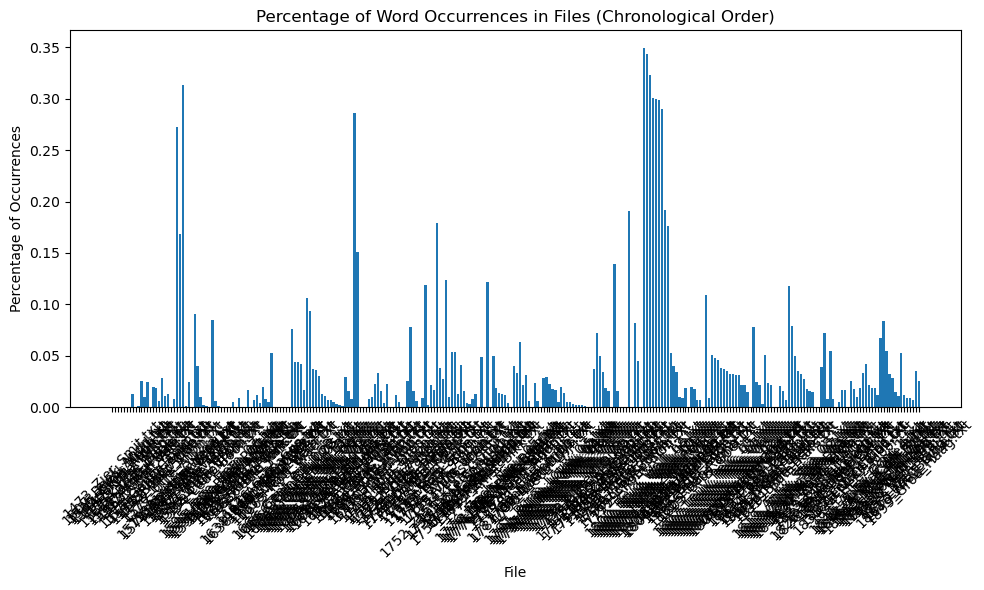

In [4]:
import os
import re
import matplotlib.pyplot as plt

wordlistNews = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe',
                    'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe','courant', 'courante', 'kourant', 
                    'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                    'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 
                    'nieuwstijdingen', 'nieuwstijding', 'nieuwstyding''nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen',
                    'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen',  'nieuwstijdinge', 'nieuwstydynghe', 
                    'nieuwstijdijnge', 'nieuwstijdijnghe']

dir = 'Chronicles'
file_counts = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()
        
        full_text = full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        count_occurrences = 0
        for w in words:
            if w in wordlistReligion:
                count_occurrences += 1
        
        year = re.findall(r'\d{4}', file) 
        if year:
            year = int(year[0])
        else:
            year = 0  
        
        file_counts.append((file, count_occurrences, round((count_occurrences/tokens)*100, 3), year))

file_counts.sort(key=lambda x: (x[3], -x[2]))

files = [file_count[0] for file_count in file_counts]
percentages = [file_count[2] for file_count in file_counts]

plt.figure(figsize=(10, 6))
plt.bar(files, percentages)
plt.xticks(rotation=45)
plt.xlabel('File')
plt.ylabel('Percentage of Occurrences')
plt.title('Percentage of Word Occurrences in Files (Chronological Order)')
plt.tight_layout()
plt.show()

C:\Users\daphn\AppData\Local\Temp\ipykernel_24036\2808227500.py:63: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


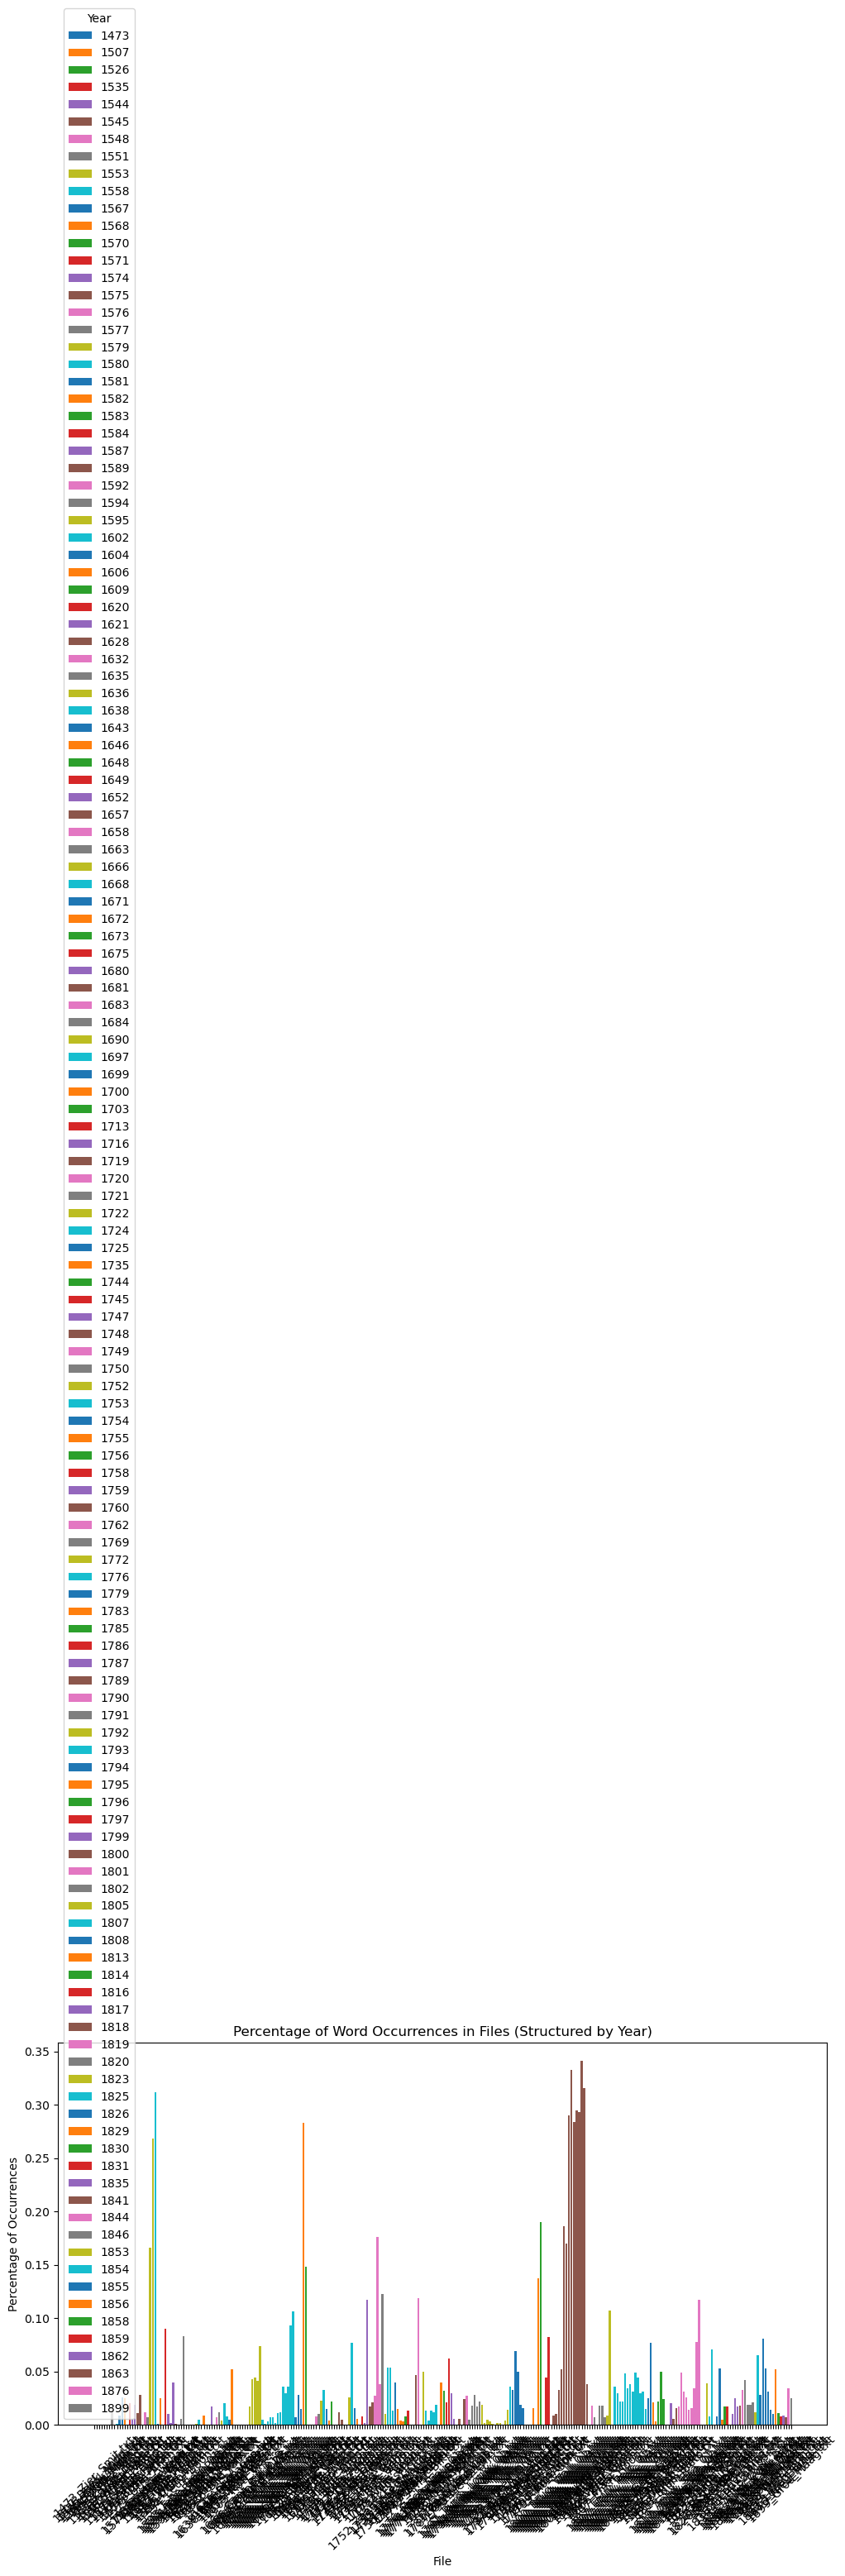

In [3]:
import os
import re
import matplotlib.pyplot as plt

wordlistNews = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe',
                'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe','courant', 'courante', 'kourant', 
                'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 
                'nieuwstijdingen', 'nieuwstijding', 'nieuwstyding''nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen',
                'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen',  'nieuwstijdinge', 'nieuwstydynghe', 
                'nieuwstijdijnge', 'nieuwstijdijnghe']

dir = 'Chronicles'
file_counts = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()
        
        full_text = full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        count_occurrences = 0
        for w in words:
            if w in wordlistNews:
                count_occurrences += 1
        
        year = re.findall(r'\d{4}', file) 
        if year:
            year = int(year[0])
        else:
            year = 0  
        
        file_counts.append((file, count_occurrences, round((count_occurrences/tokens)*100, 3), year))

# Sort the file counts by year
file_counts.sort(key=lambda x: x[3])

# Group the data by year
year_groups = {}
for file_count in file_counts:
    year = file_count[3]
    if year not in year_groups:
        year_groups[year] = {'files': [], 'percentages': []}
    year_groups[year]['files'].append(file_count[0])
    year_groups[year]['percentages'].append(file_count[2])

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
for year, data in year_groups.items():
    plt.bar(data['files'], data['percentages'], label=str(year))

plt.xticks(rotation=45)
plt.xlabel('File')
plt.ylabel('Percentage of Occurrences')
plt.title('Percentage of Word Occurrences in Files (Structured by Year)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

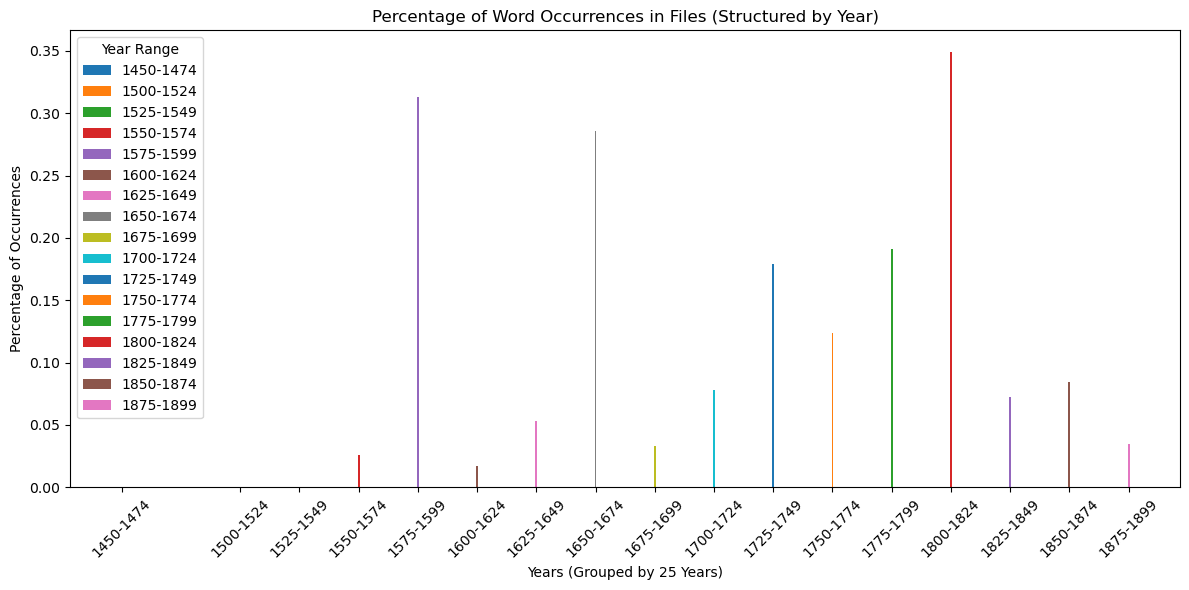

In [11]:
import os
import re
import matplotlib.pyplot as plt

wordlistNews = ['tijding', 'tyding', 'tydinge', 'tijdingh', 'tydingen', 'tydinghen', 'tijdinghe',
                'tijdinghen', 'tijdinge', 'tydynghe', 'tijdijnge', 'tijdijnghe','courant', 'courante', 'kourant', 
                'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', 
                'nieuwstijdingen', 'nieuwstijding', 'nieuwstyding''nieuwstydinge', 'nieuwstijdingh', 'nieuwstydingen',
                'nieuwstydinghen', 'nieuwstijdinghe', 'nieuwstijdinghen',  'nieuwstijdinge', 'nieuwstydynghe', 
                'nieuwstijdijnge', 'nieuwstijdijnghe']

dir = 'Chronicles'
file_counts = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()
        
        full_text = full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        count_occurrences = 0
        for w in words:
            if w in wordlistNews:
                count_occurrences += 1
        
        year = re.findall(r'\d{4}', file) 
        if year:
            year = int(year[0])
        else:
            year = 0  
        
        file_counts.append((year, count_occurrences, round((count_occurrences/tokens)*100, 3)))

# Sort the file counts by year
file_counts.sort(key=lambda x: x[0])

# Group the data by 25 years
year_groups = {}
for file_count in file_counts:
    year = file_count[0] // 25 * 25  # Grouping by 25 years
    if year not in year_groups:
        year_groups[year] = {'files': [], 'percentages': []}
    year_groups[year]['files'].append(file_count[1])
    year_groups[year]['percentages'].append(file_count[2])

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
for year, data in year_groups.items():
    plt.bar(year, data['percentages'], label=str(year) + '-' + str(year+24))

# Customizing the x-axis labels
plt.xticks(list(year_groups.keys()), [str(year) + '-' + str(year+24) for year in year_groups.keys()], rotation=45)
plt.xlabel('Years (Grouped by 25 Years)')
plt.ylabel('Percentage of Occurrences')
plt.title('Percentage of Word Occurrences in Files (Structured by Year)')
plt.legend(title='Year Range')
plt.tight_layout()
plt.show()

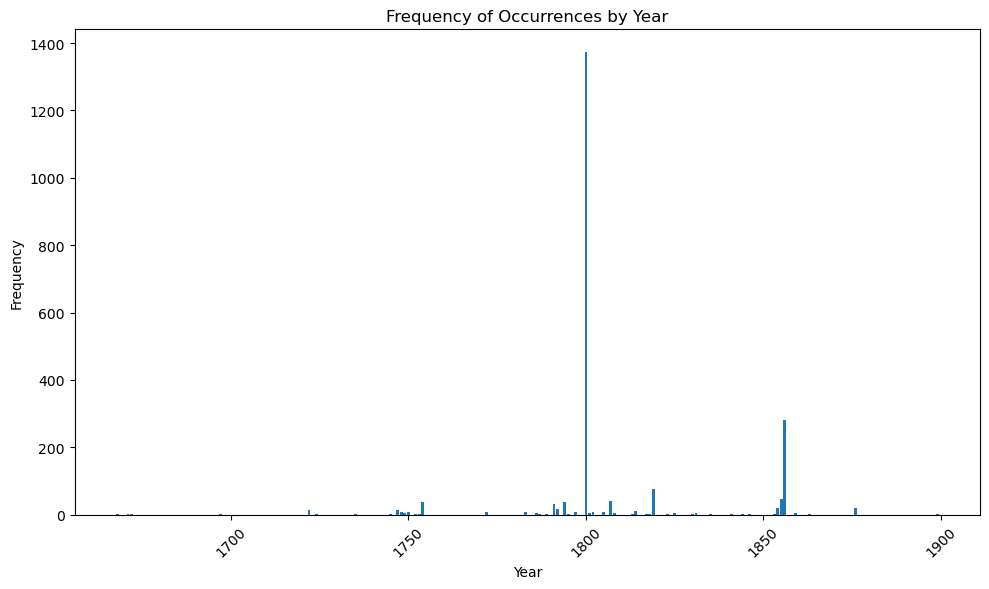

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('newspapers_def.csv')

yearly_counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Occurrences by Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

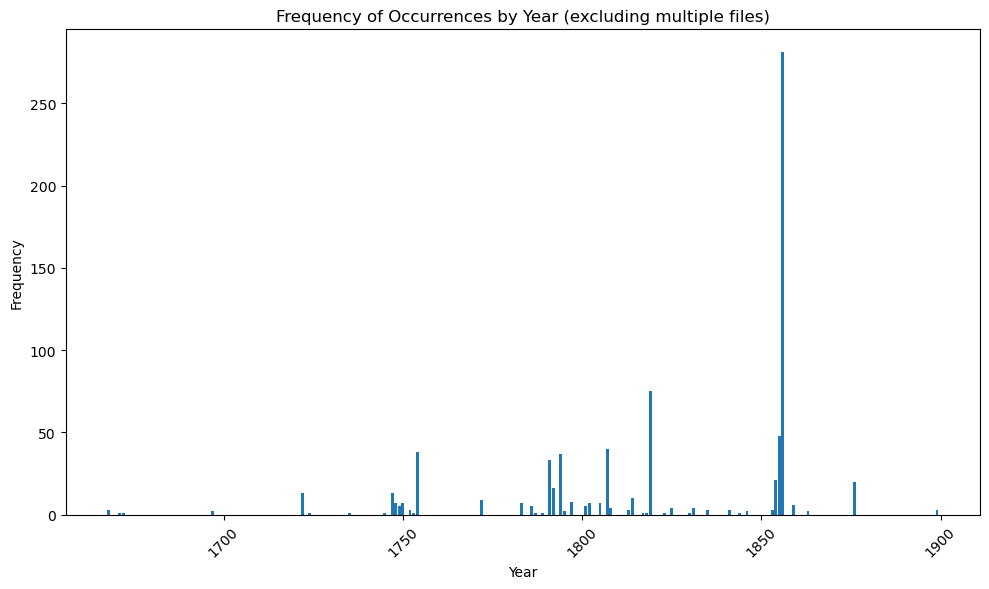

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


excluded_file_ids = [
    '1800_Brug_Wall_01', '1800_Brug_Wall_02', '1800_Brug_Wall_03',
    '1800_Brug_Wall_04', '1800_Brug_Wall_05', '1800_Brug_Wall_06',
    '1800_Brug_Wall_07', '1800_Brug_Wall_08', '1800_Brug_Wall_09',
    '1800_Brug_Wall_10', '1800_Brug_Wall_11', '1800_Brug_Wall_12',
    '1800_Brug_Wall_13'
]

df_filtered = df[~df['file_id'].isin(excluded_file_ids)]

yearly_counts = df_filtered['year'].value_counts()

plt.figure(figsize=(10, 6)) 
plt.bar(yearly_counts.index, yearly_counts.values)

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Occurrences by Year (excluding multiple files)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
wordlistNews =  ['courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                     'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', ]
dir = 'Chronicles'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):

        path = join( dir, file )

        with open( path , encoding = 'utf-8' ) as fh:
            full_text = fh.read()
        
        full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        countOccurrences = 0
        for w in words:
            if w in wordlistNews:
                #print(w)
                countOccurrences += 1
            
        print( f'{file}: {countOccurrences} mentions; { round( (countOccurrences/tokens)*100, 3) }% of all tokens' )

1473_Zier_Smit.txt: 0 mentions; 0.0% of all tokens
1507_Beek_Anon.txt: 0 mentions; 0.0% of all tokens
1526_Zwol_Muld.txt: 0 mentions; 0.0% of all tokens
1535_Gron_Anon.txt: 0 mentions; 0.0% of all tokens
1544_Bred_Anon.txt: 0 mentions; 0.0% of all tokens
1545_Kuri_Munt.txt: 0 mentions; 0.0% of all tokens
1548_Utre_Mijn.txt: 0 mentions; 0.0% of all tokens
1551_Kamp_Bred.txt: 0 mentions; 0.0% of all tokens
1553_Utre_Mijn.txt: 0 mentions; 0.0% of all tokens
1558_Bosc_Cupe.txt: 0 mentions; 0.0% of all tokens
1567_Amst_Bies.txt: 0 mentions; 0.0% of all tokens
1567_Amst_Reae.txt: 0 mentions; 0.0% of all tokens
1568_Gent_Vaer.txt: 0 mentions; 0.0% of all tokens
1570_Rott_Alle.txt: 0 mentions; 0.0% of all tokens
1571_Gent_Camp.txt: 0 mentions; 0.0% of all tokens
1574_Antw_EykP.txt: 0 mentions; 0.0% of all tokens
1574_Antw_Haec.txt: 0 mentions; 0.0% of all tokens
1575_Antw_Ulle.txt: 0 mentions; 0.0% of all tokens
1575_Bosc_Anon.txt: 0 mentions; 0.0% of all tokens
1576_Utre_Anon.txt: 0 mentions;

1792_Brie_Klui_06.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_07.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_08.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_09.txt: 0 mentions; 0.0% of all tokens
1792_Brie_Klui_10.txt: 2 mentions; 0.002% of all tokens
1792_Brie_Klui_11.txt: 1 mentions; 0.002% of all tokens
1793_Bred_Ouko.txt: 0 mentions; 0.0% of all tokens
1794_Bosc_Acke_01.txt: 2 mentions; 0.006% of all tokens
1794_Bosc_Acke_02.txt: 0 mentions; 0.0% of all tokens
1794_Goud_Anon.txt: 0 mentions; 0.0% of all tokens
1794_Hoor_Veli.txt: 2 mentions; 0.001% of all tokens
1794_Hoor_Veli_02.txt: 1 mentions; 0.001% of all tokens
1794_Zwol_Door.txt: 0 mentions; 0.0% of all tokens
1795_Deve_Jord.txt: 0 mentions; 0.0% of all tokens
1795_Harl_Tous.txt: 0 mentions; 0.0% of all tokens
1795_Maas_anon.txt: 0 mentions; 0.0% of all tokens
1795_Mege_Loef.txt: 0 mentions; 0.0% of all tokens
1795_Zalt_Kist.txt: 1 mentions; 0.006% of all tokens
1796_Antw_Aars.txt: 1 mentions; 0.015% of a

In [13]:
import os
import re
from string import punctuation
from nltk.tokenize import word_tokenize

def remove_punctuation(words):
    # Function to remove punctuation marks from a list of words
    return [word for word in words if word not in punctuation]

wordlistNews =['courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                     'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', ]


dir = 'Chronicles'
results = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()

        full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)

        countOccurrences = 0
        for w in words:
            if w in wordlistNews:
                countOccurrences += 1

        results.append((file, countOccurrences, round((countOccurrences / tokens) * 100, 3)))

results.sort(key=lambda x: x[2], reverse=True)

for file, countOccurrences, percentage in results:
    print(f'{file}: {countOccurrences} mentions; {percentage}% of all tokens')

1800_Brug_Wall_12.txt: 109 mentions; 0.288% of all tokens
1800_Brug_Wall_13.txt: 109 mentions; 0.28% of all tokens
1800_Brug_Wall_11.txt: 131 mentions; 0.276% of all tokens
1800_Brug_Wall_09.txt: 179 mentions; 0.252% of all tokens
1800_Brug_Wall_07.txt: 225 mentions; 0.251% of all tokens
1800_Brug_Wall_10.txt: 114 mentions; 0.245% of all tokens
1800_Brug_Wall_08.txt: 209 mentions; 0.236% of all tokens
1800_Brug_Wall_05.txt: 99 mentions; 0.145% of all tokens
1800_Brug_Wall_06.txt: 115 mentions; 0.134% of all tokens
1819_Binn_Kars.txt: 4 mentions; 0.094% of all tokens
1800_Brug_Wall_04.txt: 21 mentions; 0.044% of all tokens
1819_Antw_Stra_08.txt: 17 mentions; 0.031% of all tokens
1747_Utre_Woer.txt: 6 mentions; 0.025% of all tokens
1800_Brug_Wall_03.txt: 19 mentions; 0.024% of all tokens
1855_Kort_Fill_03.txt: 16 mentions; 0.022% of all tokens
1855_Kort_Fill_04.txt: 9 mentions; 0.021% of all tokens
1876_Nieu_Rybe.txt: 42 mentions; 0.02% of all tokens
1819_Antw_Stra_02.txt: 13 mentions; 0

C:\Users\daphn\AppData\Local\Temp\ipykernel_24036\596237893.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


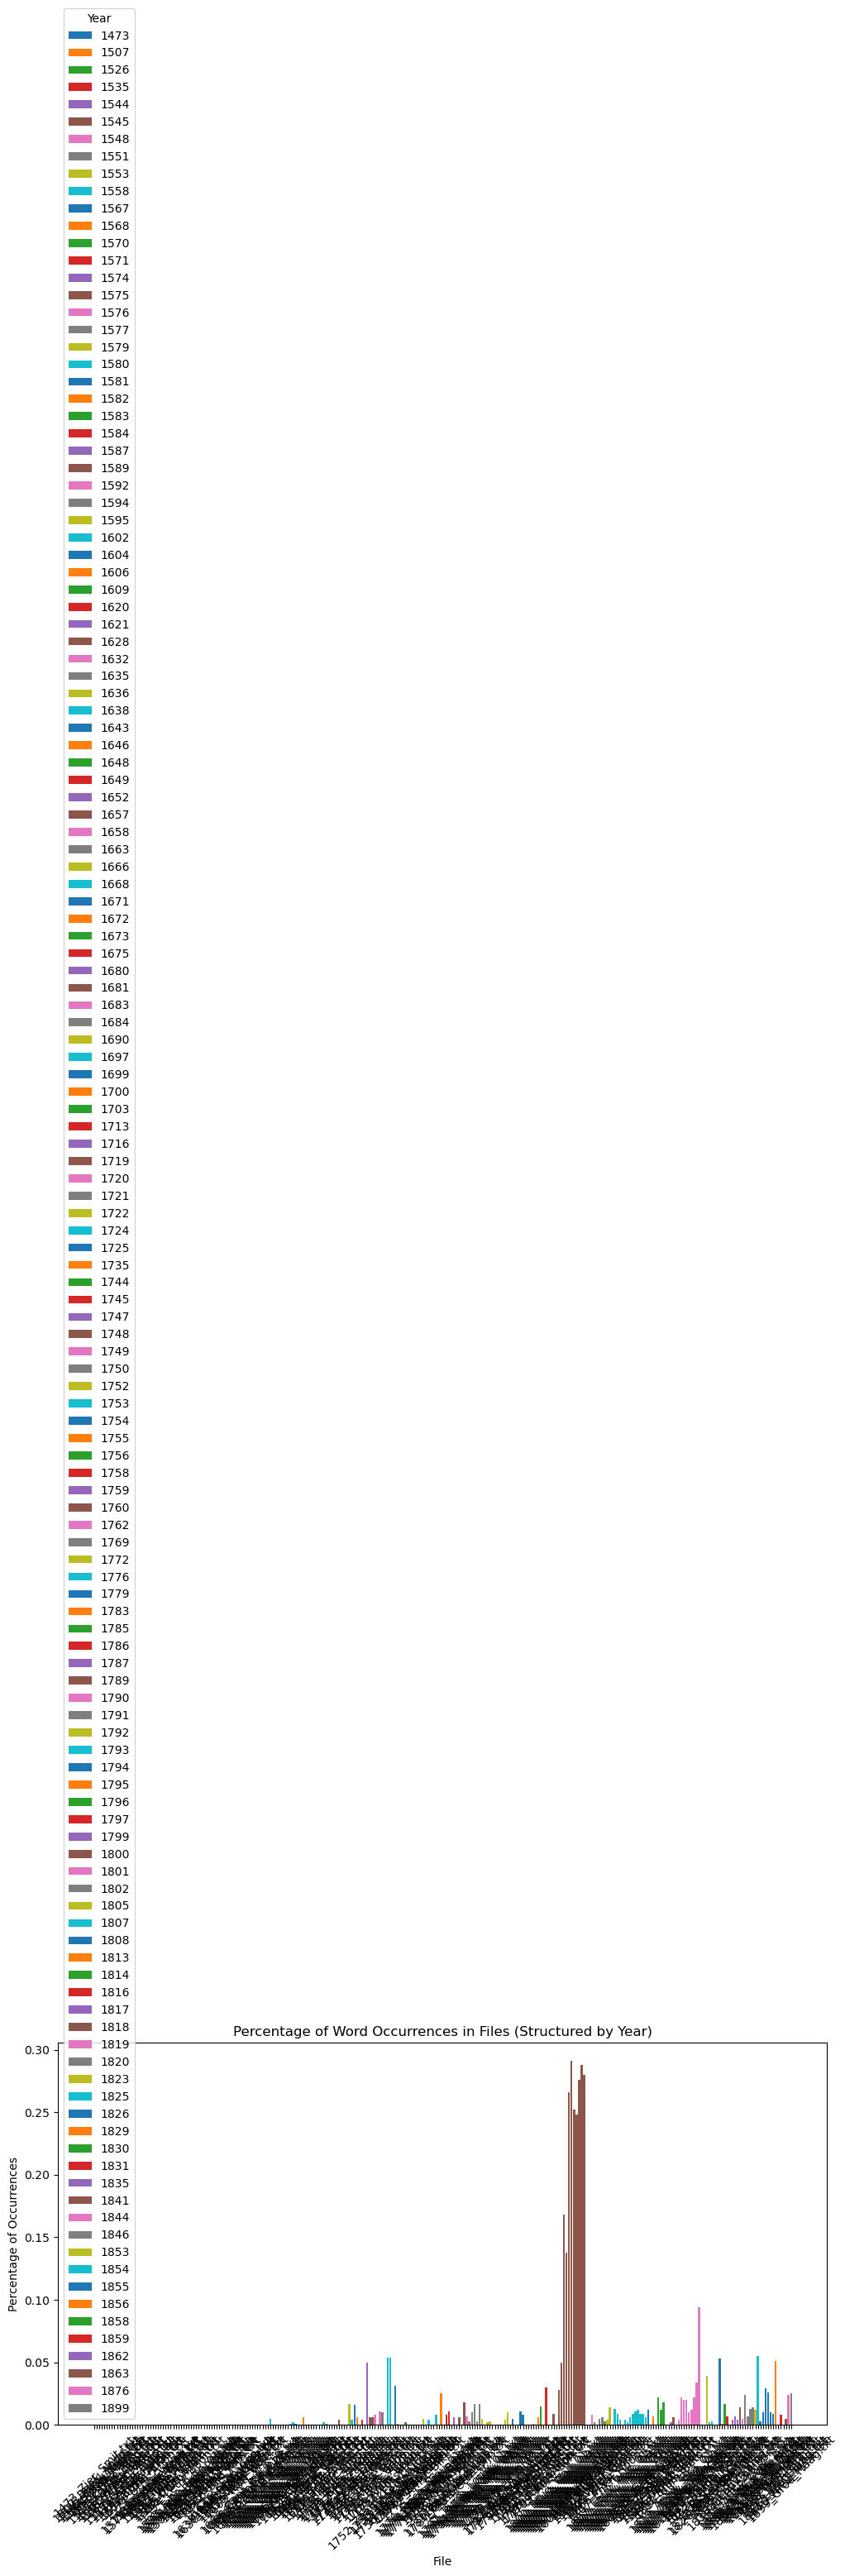

In [4]:
import os
import re
import matplotlib.pyplot as plt

wordlistNews =['courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                     'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', ]

dir = 'Chronicles'
file_counts = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()
        
        full_text = full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        count_occurrences = 0
        for w in words:
            if w in wordlistNews:
                count_occurrences += 1
        
        year = re.findall(r'\d{4}', file) 
        if year:
            year = int(year[0])
        else:
            year = 0  
        
        file_counts.append((file, count_occurrences, round((count_occurrences/tokens)*100, 3), year))

# Sort the file counts by year
file_counts.sort(key=lambda x: x[3])

# Group the data by year
year_groups = {}
for file_count in file_counts:
    year = file_count[3]
    if year not in year_groups:
        year_groups[year] = {'files': [], 'percentages': []}
    year_groups[year]['files'].append(file_count[0])
    year_groups[year]['percentages'].append(file_count[2])

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
for year, data in year_groups.items():
    plt.bar(data['files'], data['percentages'], label=str(year))

plt.xticks(rotation=45)
plt.xlabel('File')
plt.ylabel('Percentage of Occurrences')
plt.title('Percentage of Word Occurrences in Files (Structured by Year)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

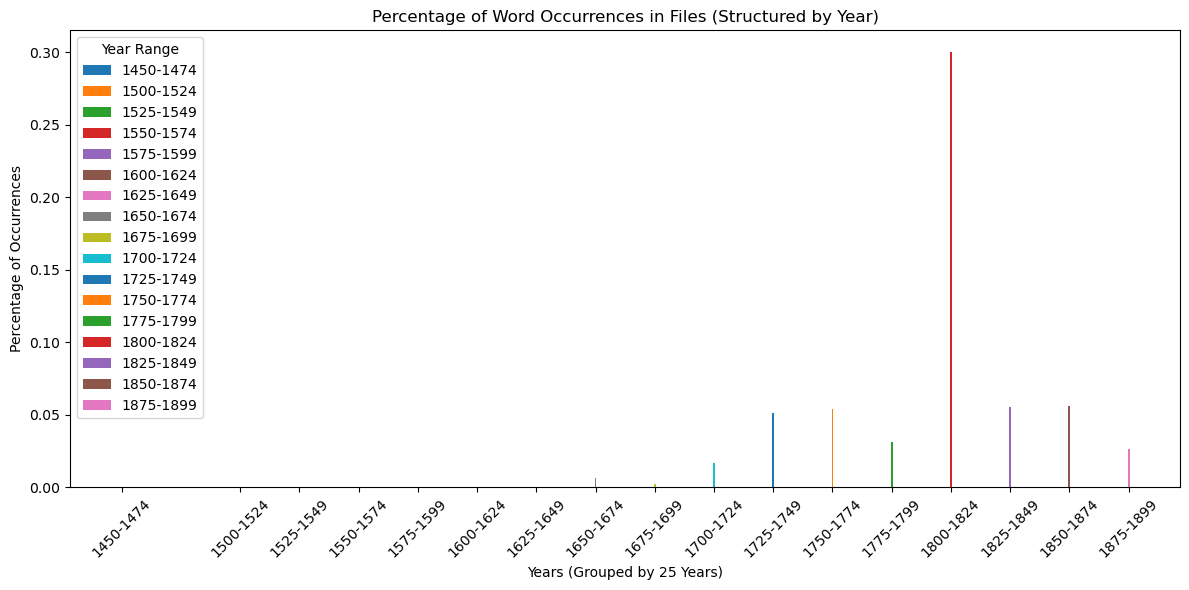

In [12]:
import os
import re
import matplotlib.pyplot as plt

wordlistNews =['courant', 'courante', 'kourant', 'courantier', 'couranten', 'krant', 'kranten','gazette', 'gaset', 'gasetten', 'gasette','nieuwsbladen',
                     'nieuwsblaederen', 'nieuwsblad', 'nieuwsblaed', 'nieuws blaed', 'nieuws blaederen', 'nieuwsbladt', 'nieuws bladt', ]


dir = 'Chronicles'
file_counts = []

for file in os.listdir(dir):
    if re.search(r'\.txt$', file):
        path = os.path.join(dir, file)
        
        with open(path, encoding='utf-8') as fh:
            full_text = fh.read()
        
        full_text = full_text.lower()
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        count_occurrences = 0
        for w in words:
            if w in wordlistNews:
                count_occurrences += 1
        
        year = re.findall(r'\d{4}', file) 
        if year:
            year = int(year[0])
        else:
            year = 0  
        
        file_counts.append((year, count_occurrences, round((count_occurrences/tokens)*100, 3)))

# Sort the file counts by year
file_counts.sort(key=lambda x: x[0])

# Group the data by 25 years
year_groups = {}
for file_count in file_counts:
    year = file_count[0] // 25 * 25  # Grouping by 25 years
    if year not in year_groups:
        year_groups[year] = {'files': [], 'percentages': []}
    year_groups[year]['files'].append(file_count[1])
    year_groups[year]['percentages'].append(file_count[2])

# Create a bar plot for each year
plt.figure(figsize=(12, 6))
for year, data in year_groups.items():
    plt.bar(year, data['percentages'], label=str(year) + '-' + str(year+24))

# Customizing the x-axis labels
plt.xticks(list(year_groups.keys()), [str(year) + '-' + str(year+24) for year in year_groups.keys()], rotation=45)
plt.xlabel('Years (Grouped by 25 Years)')
plt.ylabel('Percentage of Occurrences')
plt.title('Percentage of Word Occurrences in Files (Structured by Year)')
plt.legend(title='Year Range')
plt.tight_layout()
plt.show()